In [2]:
import pandas as pd

# read the CSV file
dataframe = pd.read_csv('https://raw.githubusercontent.com/DDOS-Attacks-detection-in-IOT-using-ML/DDOS-Detection/main/DDoSdata.csv')
cols=['saddr','daddr','pkts']
dataframe[cols]

,saddr,daddr,pkts
0,192.168.100.150,192.168.100.3,10
1,192.168.100.150,192.168.100.3,8
2,192.168.100.149,192.168.100.3,10
3,192.168.100.149,192.168.100.3,15
4,192.168.100.149,192.168.100.3,11
...,...,...,...
91,192.168.100.150,192.168.100.3,14
92,192.168.100.3,192.168.100.147,21
93,192.168.100.3,192.168.100.148,21
94,192.168.100.3,192.168.100.150,21


In [3]:
filtered_df = dataframe[dataframe['pkts'] >= 6]

# group the filtered dataframe by saddr and apply the difference calculation
result = filtered_df.groupby('saddr')['pkts'].apply(lambda x: x.diff().dropna())

print(result)

saddr              
192.168.100.147  6     -2.0
                 8     -1.0
                 18    -1.0
                 19    -1.0
                 25     7.0
                       ... 
192.168.100.3    89     2.0
                 92    12.0
                 93     0.0
                 94     0.0
                 95     0.0
Name: pkts, Length: 65, dtype: float64


In [15]:
import pandas as pd

# get only unique source addresses
unique_values = dataframe['saddr'].unique()

print(unique_values)
desired_rows = []
my_dict = {}
for i in unique_values:
    desired_rows = dataframe[dataframe['saddr'] == i]
    my_dict[i] = desired_rows['pkts'].values.__array__()

['192.168.100.150' '192.168.100.149' '192.168.100.147' '192.168.100.148'
 '192.168.100.3']


In [5]:
ips = []
packets = []
for key,value in my_dict.items(): # get a list of dictionary items
    for i in range(len(value) -1):  # iterate over the list of items
        diff = value[i+1] - value[i]
        if diff >= 6:
            print('DDOS attack on IP Address: ', key, "with a packet difference of ", diff)
            ips.append(key)
            packets.append(diff)

print("IPs", ips)
print("packets: " , packets)


DDOS attack on IP Address:  192.168.100.150 with a packet difference of  11
DDOS attack on IP Address:  192.168.100.150 with a packet difference of  7
DDOS attack on IP Address:  192.168.100.150 with a packet difference of  6
DDOS attack on IP Address:  192.168.100.147 with a packet difference of  7
DDOS attack on IP Address:  192.168.100.147 with a packet difference of  13
DDOS attack on IP Address:  192.168.100.148 with a packet difference of  8
DDOS attack on IP Address:  192.168.100.148 with a packet difference of  9
DDOS attack on IP Address:  192.168.100.148 with a packet difference of  9
DDOS attack on IP Address:  192.168.100.3 with a packet difference of  16
IPs ['192.168.100.150', '192.168.100.150', '192.168.100.150', '192.168.100.147', '192.168.100.147', '192.168.100.148', '192.168.100.148', '192.168.100.148', '192.168.100.3']
packets:  [11, 7, 6, 7, 13, 8, 9, 9, 16]


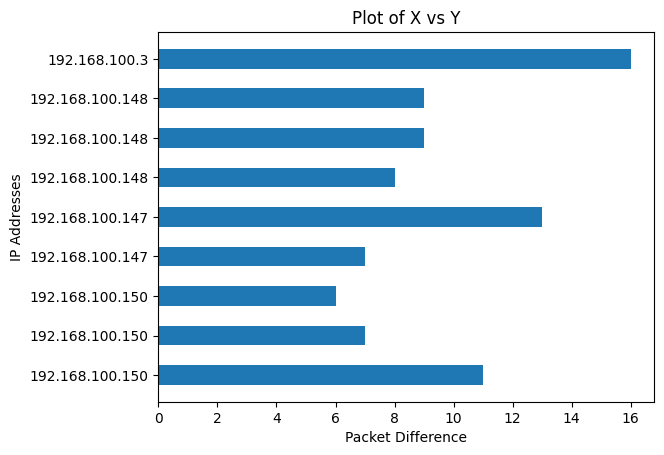

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.barh(np.arange(len(ips)), packets, height=0.5, align='center')
plt.yticks(np.arange(len(ips)), ips)

plt.xlabel('Packet Difference')
plt.ylabel('IP Addresses')
plt.title('Plot of X vs Y')
plt.show()


In [10]:
df_attacked = dataframe[ (dataframe['category'] =='DDoS') ]

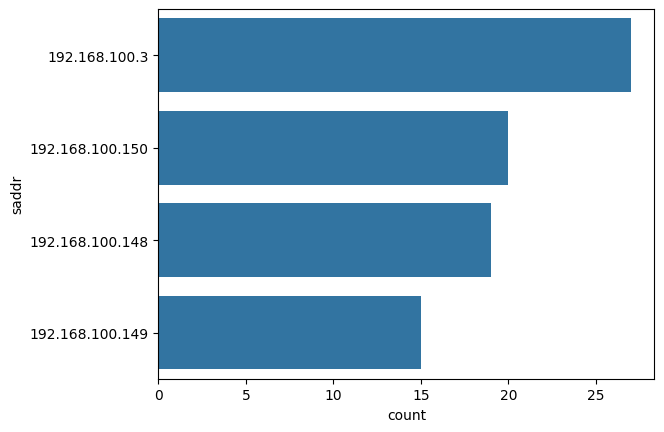

In [11]:
import seaborn as sb
def gen_bar(column,num_observ,df_type):
    base_color = sb.color_palette()[0]
    bot_order = df_type[column].value_counts()[:num_observ].index
    sb.countplot(data = df_type, y = column, color = base_color, order = bot_order)
gen_bar('saddr',4,df_attacked)

In [12]:
dataframe.daddr.value_counts().iloc[:4]

daddr
192.168.100.3      69
192.168.100.150     9
192.168.100.147     7
192.168.100.149     6
Name: count, dtype: int64

In [13]:
# getting a statistics of malicious packet count in each transaction
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_attacked.pkts.describe()

count   96.00000
mean     9.28125
std      5.49776
min      1.00000
25%      5.00000
50%      9.00000
75%     13.00000
max     21.00000
Name: pkts, dtype: float64

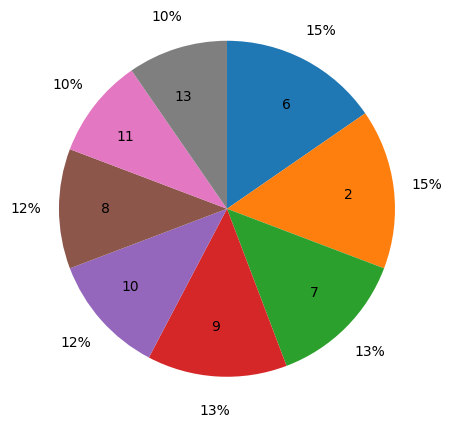

In [14]:
# generating a pie chart for attack dataset about the packets per transcition number.
def gen_pie(column,num_observ,df_type):
    sorted_counts = df_type[column].value_counts()[:num_observ]
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.0f%%', pctdistance=1.2, labeldistance=0.7,counterclock = False)
    plt.axis('square')
gen_pie('pkts',8,df_attacked)